In [1]:
import pandas as pd
import numpy as np
movies = pd.read_csv('movie_metadata.csv')
movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [2]:
movies.dropna(inplace=True)
movies.title_year = movies.title_year.astype(np.int64)
movies.gross = movies.gross.astype(np.int64)
movies = movies.drop_duplicates(['movie_title'])
movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009,11000.0,7.5,2.35,10000
10,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062,Action|Adventure|Sci-Fi,...,3018.0,English,USA,PG-13,250000000.0,2016,4000.0,6.9,2.35,197000


In [3]:
top_10_gross_movie = movies[['movie_title', 'imdb_score', 'director_name', 'title_year', 'gross', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'genres']].sort_values('gross', ascending=False)[:10]
top_10_gross_movie

,movie_title,imdb_score,director_name,title_year,gross,actor_1_name,actor_2_name,actor_3_name,genres
0,Avatar,7.9,James Cameron,2009,760505847,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi
26,Titanic,7.7,James Cameron,1997,658672302,Leonardo DiCaprio,Kate Winslet,Gloria Stuart,Drama|Romance
29,Jurassic World,7.0,Colin Trevorrow,2015,652177271,Bryce Dallas Howard,Judy Greer,Omar Sy,Action|Adventure|Sci-Fi|Thriller
17,The Avengers,8.1,Joss Whedon,2012,623279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,Action|Adventure|Sci-Fi
66,The Dark Knight,9.0,Christopher Nolan,2008,533316061,Christian Bale,Heath Ledger,Morgan Freeman,Action|Crime|Drama|Thriller
240,Star Wars: Episode I - The Phantom Menace,6.5,George Lucas,1999,474544677,Natalie Portman,Liam Neeson,Ian McDiarmid,Action|Adventure|Fantasy|Sci-Fi
3024,Star Wars: Episode IV - A New Hope,8.7,George Lucas,1977,460935665,Harrison Ford,Peter Cushing,Kenny Baker,Action|Adventure|Fantasy|Sci-Fi
8,Avengers: Age of Ultron,7.5,Joss Whedon,2015,458991599,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,Action|Adventure|Sci-Fi
3,The Dark Knight Rises,8.5,Christopher Nolan,2012,448130642,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller
582,Shrek 2,7.2,Andrew Adamson,2004,436471036,Rupert Everett,Jennifer Saunders,Conrad Vernon,Adventure|Animation|Comedy|Family|Fantasy|Romance


In [4]:
actors_gross = movies[movies['title_year'].isin(range(2000, 2017))]
actors_gross
actors_gross = actors_gross[['actor_1_name', 'gross', 'title_year']]
actors_gross.sort_values(['title_year', 'gross'], ascending=False, inplace=True)
actors_gross = actors_gross.groupby(['title_year']).head(5).reset_index(drop=True)
actors_gross.set_index(['title_year', 'actor_1_name'], inplace=True)
actors_gross

gross
title_year actor_1_name                  
2016       Robert Downey Jr.    407197282
           Ryan Reynolds        363024263
           Scarlett Johansson   362645141
           Henry Cavill         330249062
           Steve Coogan         323505540
2015       Bryce Dallas Howard  652177271
           Chris Hemsworth      458991599
           Amy Poehler          356454367
           Jason Statham        350034110
           Steve Carell         336029560
2014       Bradley Cooper       350123553
           Jennifer Lawrence    337103873
           Bradley Cooper       333130696
           Scarlett Johansson   259746958
           Morgan Freeman       257756197
2013       Jennifer Lawrence    424645577
           Robert Downey Jr.    408992272
           Josh Gad             400736600
           Steve Carell         368049635
           Henry Cavill         291021565
2012       Chris Hemsworth      623279547
           Tom Hardy            448130642
           Jennifer Lawrence    407999255
           Albert Finney        304360277
           Robert Pattinson     292298923
2011       Glenn Morshower      352358779
           Bradley Cooper       254455986
           Johnny Depp          241063875
           Paul Walker          209805005
           Tom Cruise           209364921
...                                   ...
2005       Natalie Portman      380262555
           Jim Broadbent        291709845
           Robert Pattinson     289994397
           Tom Cruise           234277056
           Naomi Watts          218051260
2004       Rupert Everett       436471036
           J.K. Simmons         373377893
           Robert De Niro       279167575
           Holly Hunter         261437578
           Daniel Radcliffe     249358727
2003       Alexander Gould      380838870
           Orlando Bloom        377019252
           Johnny Depp          305388685
           Steve Bastoni        281492479
           Morgan Freeman       242589580
2002       J.K. Simmons         403706375
           Christopher Lee      340478898
           Natalie Portman      310675583
           Daniel Radcliffe     261970615
           Nia Vardalos         241437427
2001       Daniel Radcliffe     317557891
           Christopher Lee      313837577
           Steve Buscemi        289907418
           Kathleen Freeman     267652016
           Mei Melançon         226138454
2000       Clint Howard         260031035
           Tom Hanks            233630478
           Tom Cruise           215397307
           Djimon Hounsou       187670866
           Judy Greer           182805123

[85 rows x 1 columns]

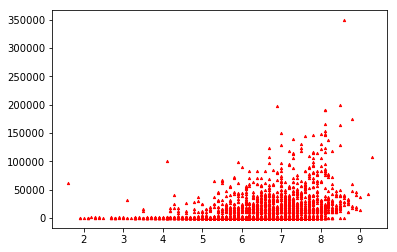

In [5]:
import matplotlib.pyplot as plt
score_likes = movies[['imdb_score', 'movie_facebook_likes']]
plt.scatter(score_likes['imdb_score'].values, score_likes['movie_facebook_likes'].values, s=[5], marker='^', c='r')
plt.show()

In [6]:
#The return on investment formula is: ROI = (Net Profit / Cost of Investment) x 100
movie_returns = movies.loc[:, ['movie_title', 'gross', 'budget']]
movie_returns['Profit'] = movie_returns['gross'] - movie_returns['budget']
movie_returns['Returns'] = (movie_returns['Profit']/movie_returns['budget'])*100
movie_returns.Returns = movie_returns.Returns.astype(np.int64)
movie_returns.sort_values('Returns', ascending=False, inplace=True)
movie_returns 

,movie_title,gross,budget,Profit,Returns
4793,Paranormal Activity,107917283,1.500000e+04,1.079023e+08,719348
4799,Tarnation,592014,2.180000e+02,5.917960e+05,271466
4707,The Blair Witch Project,140530114,6.000000e+04,1.404701e+08,234116
4984,The Brothers McMullen,10246600,2.500000e+04,1.022160e+07,40886
3278,The Texas Chain Saw Massacre,30859000,8.353200e+04,3.077547e+07,36842
5035,El Mariachi,2040920,7.000000e+03,2.033920e+06,29056
4956,The Gallows,22757819,1.000000e+05,2.265782e+07,22657
4977,Super Size Me,11529368,6.500000e+04,1.146437e+07,17637
2492,Halloween,47000000,3.000000e+05,4.670000e+07,15566
4674,American Graffiti,115000000,7.770000e+05,1.142230e+08,14700


In [7]:
director_returns = movies.loc[:, ['director_name', 'gross', 'budget']]
director_returns = director_returns.groupby('director_name').mean()
director_returns['Profit'] = director_returns['gross'] - director_returns['budget']
director_returns['Returns'] = (director_returns['Profit']/director_returns['budget'])*100
director_returns.Returns = director_returns.Returns.astype(np.int64)
director_returns.sort_values('Returns', ascending=False, inplace=True)
director_returns

,gross,budget,Profit,Returns
director_name,,,,
Oren Peli,1.079173e+08,1.500000e+04,1.079023e+08,719348
Jonathan Caouette,5.920140e+05,2.180000e+02,5.917960e+05,271466
Daniel Myrick,1.405301e+08,6.000000e+04,1.404701e+08,234116
Travis Cluff,2.275782e+07,1.000000e+05,2.265782e+07,22657
William Cottrell,1.849255e+08,2.000000e+06,1.829255e+08,9146
Joe Camp,3.955260e+07,5.000000e+05,3.905260e+07,7810
Jafar Panahi,6.737800e+05,1.000000e+04,6.637800e+05,6637
Shane Carruth,4.247600e+05,7.000000e+03,4.177600e+05,5968
Robert Townsend,5.228617e+06,1.000000e+05,5.128617e+06,5128


In [8]:
directors = list(director_returns.head().index.values)
movies.loc[movies['director_name'].isin(directors)]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4449,Color,William Cottrell,145.0,83.0,0.0,31.0,Billy Gilbert,82.0,184925485,Animation|Family|Fantasy|Musical,...,204.0,English,USA,Approved,2000000.0,1937,47.0,7.7,1.37,0
4707,Black and White,Daniel Myrick,360.0,81.0,19.0,39.0,Joshua Leonard,170.0,140530114,Horror,...,3400.0,English,USA,R,60000.0,1999,170.0,6.4,1.33,0
4793,Color,Oren Peli,409.0,84.0,110.0,21.0,Ashley Palmer,189.0,107917283,Horror,...,1189.0,English,USA,R,15000.0,2007,109.0,6.3,1.85,12000
4799,Color,Jonathan Caouette,72.0,88.0,20.0,0.0,Jonathan Caouette,58.0,592014,Biography|Documentary,...,114.0,English,USA,Unrated,218.0,2003,20.0,7.2,1.37,754
4956,Color,Travis Cluff,159.0,81.0,3.0,7.0,Cassidy Gifford,220.0,22757819,Horror|Thriller,...,150.0,English,USA,R,100000.0,2015,40.0,4.2,1.85,0
